## Course Project

**Instructions:** <br>
a. In the course project, you will analyze a real-world dataset on housing sale price prediction. You will write a report on your data analysis using Jupyter Notebook. <br>
b. For each step, make sure to explain what you are doing, annotate your results, and provide your interpretation. <br>
c. When you finish, make sure to use `Kernel` -> `Restart and Run All` to restart the kernel and rerun the entire notebook to generate the desired outputs, before submitting your project report. <br>
d. Upload your .ipynb file to Canvas for grading. <br>
e. All questions related to the course project shall be posted in the Discussions section on Canvas. <br>
<br>

**Policy:** <br>
The course project is worth 25 points, counting towards 25% of the course final score. <br>

Late submission, empty submission or no submission receives 0 point. Please note that in order to pass the course, at least 30% of the total score for the project must be obtained. In case of special circumstances, email the instructor directly ahead of time.


### Housing Sale Price Prediction

You can download the csv files from the project folder on Canvas. <br>

#### Context

There can be tons of reasons that affect the price of a house. This project aims to predict the final price of each home `SalePrice`. <br>

#### Variables: Brief Description

SalePrice - the property"s sale price in dollars: the target variable to predict.<br>
MSSubClass: The building class<br>
MSZoning: The general zoning classification<br>
LotFrontage: Linear feet of street connected to property<br>
LotArea: Lot size in square feet<br>
Street: Type of road access<br>
Alley: Type of alley access<br>
LotShape: General shape of property<br>
LandContour: Flatness of the property<br>
Utilities: Type of utilities available<br>
LotConfig: Lot configuration<br>
LandSlope: Slope of property<br>
Neighborhood: Physical locations within Ames city limits<br>
Condition1: Proximity to main road or railroad<br>
Condition2: Proximity to main road or railroad (if a second is present)<br>
BldgType: Type of dwelling<br>
HouseStyle: Style of dwelling<br>
OverallQual: Overall material and finish quality<br>
OverallCond: Overall condition rating<br>
YearBuilt: Original construction date<br>
YearRemodAdd: Remodel date<br>
RoofStyle: Type of roof<br>
RoofMatl: Roof material<br>
Exterior1st: Exterior covering on house<br>
Exterior2nd: Exterior covering on house (if more than one material)<br>
MasVnrType: Masonry veneer type<br>
MasVnrArea: Masonry veneer area in square feet<br>
ExterQual: Exterior material quality<br>
ExterCond: Present condition of the material on the exterior<br>
Foundation: Type of foundation<br>
BsmtQual: Height of the basement<br>
BsmtCond: General condition of the basement<br>
BsmtExposure: Walkout or garden level basement walls<br>
BsmtFinType1: Quality of basement finished area<br>
BsmtFinSF1: Type 1 finished square feet<br>
BsmtFinType2: Quality of second finished area (if present)<br>
BsmtFinSF2: Type 2 finished square feet<br>
BsmtUnfSF: Unfinished square feet of basement area<br>
TotalBsmtSF: Total square feet of basement area<br>
Heating: Type of heating<br>
HeatingQC: Heating quality and condition<br>
CentralAir: Central air conditioning<br>
Electrical: Electrical system<br>
1stFlrSF: First Floor square feet<br>
2ndFlrSF: Second floor square feet<br>
LowQualFinSF: Low quality finished square feet (all floors)<br>
GrLivArea: Above grade (ground) living area square feet<br>
BsmtFullBath: Basement full bathrooms<br>
BsmtHalfBath: Basement half bathrooms<br>
FullBath: Full bathrooms above grade<br>
HalfBath: Half baths above grade<br>
Bedroom: Number of bedrooms above basement level<br>
Kitchen: Number of kitchens<br>
KitchenQual: Kitchen quality<br>
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)<br>
Functional: Home functionality rating<br>
Fireplaces: Number of fireplaces<br>
FireplaceQu: Fireplace quality<br>
GarageType: Garage location<br>
GarageYrBlt: Year garage was built<br>
GarageFinish: Interior finish of the garage<br>
GarageCars: Size of garage in car capacity<br>
GarageArea: Size of garage in square feet<br>
GarageQual: Garage quality<br>
GarageCond: Garage condition<br>
PavedDrive: Paved driveway<br>
WoodDeckSF: Wood deck area in square feet<br>
OpenPorchSF: Open porch area in square feet<br>
EnclosedPorch: Enclosed porch area in square feet<br>
3SsnPorch: Three season porch area in square feet<br>
ScreenPorch: Screen porch area in square feet<br>
PoolArea: Pool area in square feet<br>
PoolQC: Pool quality<br>
Fence: Fence quality<br>
MiscFeature: Miscellaneous feature not covered in other categories<br>
MiscVal: Value of miscellaneous feature<br>
MoSold: Month Sold<br>
YrSold: Year Sold<br>
SaleType: Type of sale<br>
SaleCondition: Condition of sale<br>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA


In [2]:
%matplotlib inline
sns.set_palette("pastel")
colorSet = sns.color_palette("Set1", 10)


### Module 1: Data Exploration

Load `housing_train.csv` and explore the dataset. How do the data look like? Are there any missing values? What do you do with missing values, i.e. removal, imputation, etc.?<br>
Are there any outliers? What do you do with outliers, i.e. drop them, explore the effects of outliers on models, etc.? <br>
Record your analysis procedures. For example, 20 observations are removed due to missingness, and 3,000 observations remain for further analysis. <br>

Hint: for removal of extreme outliers, consider: Q1=df.quantile(0.25); Q3=df.quantile(0.75); IQR=Q3-Q1; <br>
Remove samples that are smaller than Q1 - 2.5 _ IQR or larger than Q3 + 2.5 _ IQR.


#### Data loading


In [3]:
df = pd.read_csv("housing_train.csv", index_col="Id").sort_index()
print(f"Data shape: {df.shape}")


Data shape: (1200, 80)


#### Missing data


In [4]:
nanCount = df.isna().sum()
nanCount[nanCount != 0]


LotFrontage      211
Alley           1129
MasVnrType         6
MasVnrArea         6
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
FireplaceQu      575
GarageType        69
GarageYrBlt       69
GarageFinish      69
GarageQual        69
GarageCond        69
PoolQC          1194
Fence            974
MiscFeature     1158
dtype: int64

#### Data imputation


In [5]:
for col in df.columns:
    match df[col].dtype:
        case np.int64:
            df[col] = df[col].fillna(0)
        case np.float64:
            df[col] = df[col].fillna(0)
        case object:
            df[col] = df[col].fillna("None")


#### Outliner removal


In [6]:
Q1 = df.quantile(q=0.25, numeric_only=True)
Q3 = df.quantile(q=0.75, numeric_only=True)
IQR = Q3 - Q1
lBound = Q1 - 2.5 * IQR
hBound = Q3 + 2.5 * IQR

adjDf = df[~(df.lt(lBound) | df.gt(hBound)).any(axis=1)]
print(f"Data shape: {adjDf.shape}")


Data shape: (607, 80)


#### Summary


In [7]:
print(f"Before any data modification, the shape of the dataset was {df.shape[0]} rows by {df.shape[1]} columns")
print(f"After data modification, the shape of the dataset was {adjDf.shape[0]} rows by {adjDf.shape[1]} columns")


Before any data modification, the shape of the dataset was 1200 rows by 80 columns
After data modification, the shape of the dataset was 607 rows by 80 columns


-   Missing values are filled by 0 and none.
-   Extreme outliers with IOR > 2.5 are removed.


In [8]:
print(f"{nanCount.sum()} observations are filled due to missingness, and {df.shape[0]} observations remain for further analysis.")
print(f"{df.shape[0] - adjDf.shape[0]} observations are removed due to outlining, and {adjDf.shape[0]} observations remain for further analysis.")


5750 observations are filled due to missingness, and 1200 observations remain for further analysis.
593 observations are removed due to outlining, and 607 observations remain for further analysis.


### Module 2: Data Visualization

What are the distributions of variables? Are the variables distributed differently in the high-price group (i.e. > 300,000) versus the low-price group? Use tables and/or figures to visualize your exploration and findings. Present no more than 5 figures/tables that you think are important, and you may state in your findings that variables a, b, c have similar patterns.


#### Divided dataset into 2 groups base on Sale Price


In [9]:
adjDf.insert(len(adjDf.columns), "HighPrice", adjDf["SalePrice"].gt(300000))
hpGroup = adjDf[adjDf["HighPrice"]]
lpGroup = adjDf[~adjDf["HighPrice"]]


#### Compare Lot Area of two price group


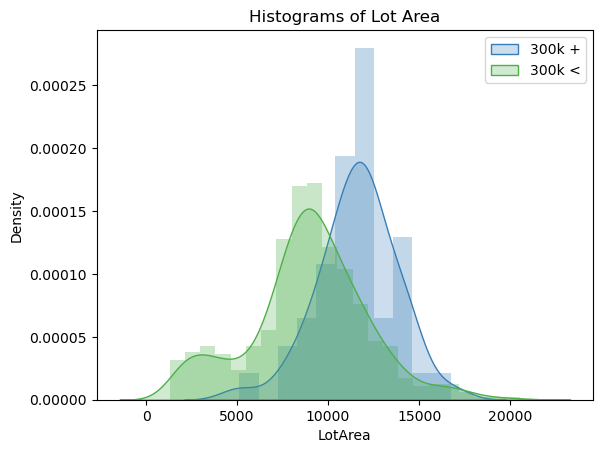

In [10]:
sns.histplot(hpGroup["LotArea"], stat="density", alpha=0.3, color=colorSet[1], linewidth=0)
sns.histplot(lpGroup["LotArea"], stat="density", alpha=0.3, color=colorSet[2], linewidth=0)

sns.kdeplot(hpGroup["LotArea"], fill=True, color=colorSet[1])
sns.kdeplot(lpGroup["LotArea"], fill=True, color=colorSet[2])

plt.legend(labels=["300k +", "300k <"])
plt.title("Histograms of Lot Area")
print()


High Price group tends to have larger size in Lot Area.

#### Compare Built Years of two price group


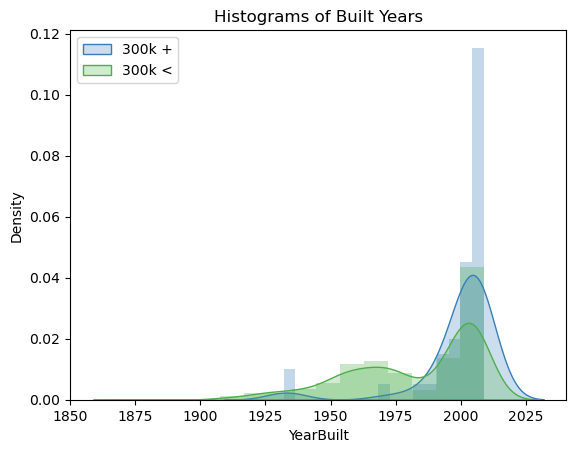

In [11]:
sns.histplot(hpGroup["YearBuilt"], stat="density", alpha=0.3, color=colorSet[1], linewidth=0)
sns.histplot(lpGroup["YearBuilt"], stat="density", alpha=0.3, color=colorSet[2], linewidth=0)

sns.kdeplot(hpGroup["YearBuilt"], fill=True, color=colorSet[1])
sns.kdeplot(lpGroup["YearBuilt"], fill=True, color=colorSet[2])

plt.legend(labels=["300k +", "300k <"])
plt.title("Histograms of Built Years")
print()


High Price group tends to build later in Year Built.

#### Box plot of OverallQual against SalePrice


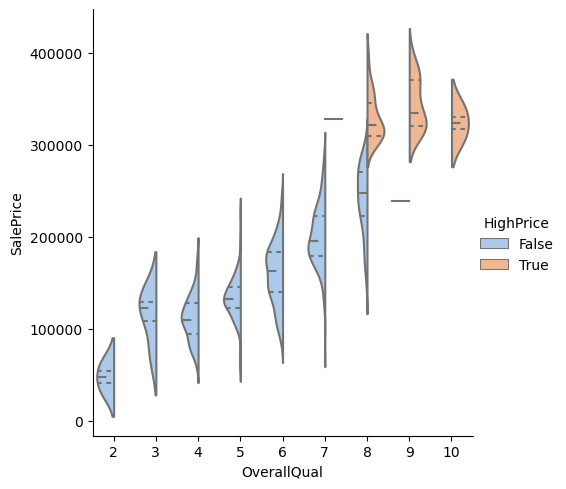

In [12]:
sns.catplot(data=adjDf, x="OverallQual", y="SalePrice", hue="HighPrice", kind="violin", split=True, inner="quartile")
print()


High Price group tends to have better Overall Quality.

#### Joint distributions on OverallQual and OverallCond against HighPrice

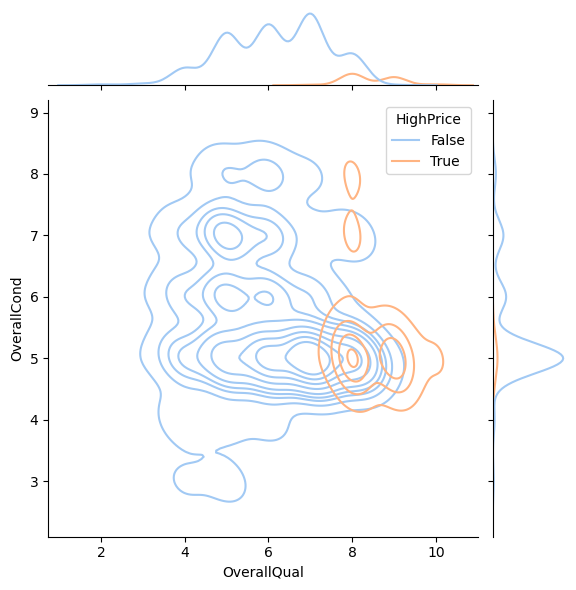

In [13]:
sns.jointplot(data=adjDf, x="OverallQual", y="OverallCond", hue="HighPrice", kind='kde')
print()

High Price group tends to have better Overall Quality and Overall Condition.

#### Pair Plot of Lot Area, Total Basement Area, 1st Floor Area, 2nd Floor Area, Garage Area, Pool Area with High Price


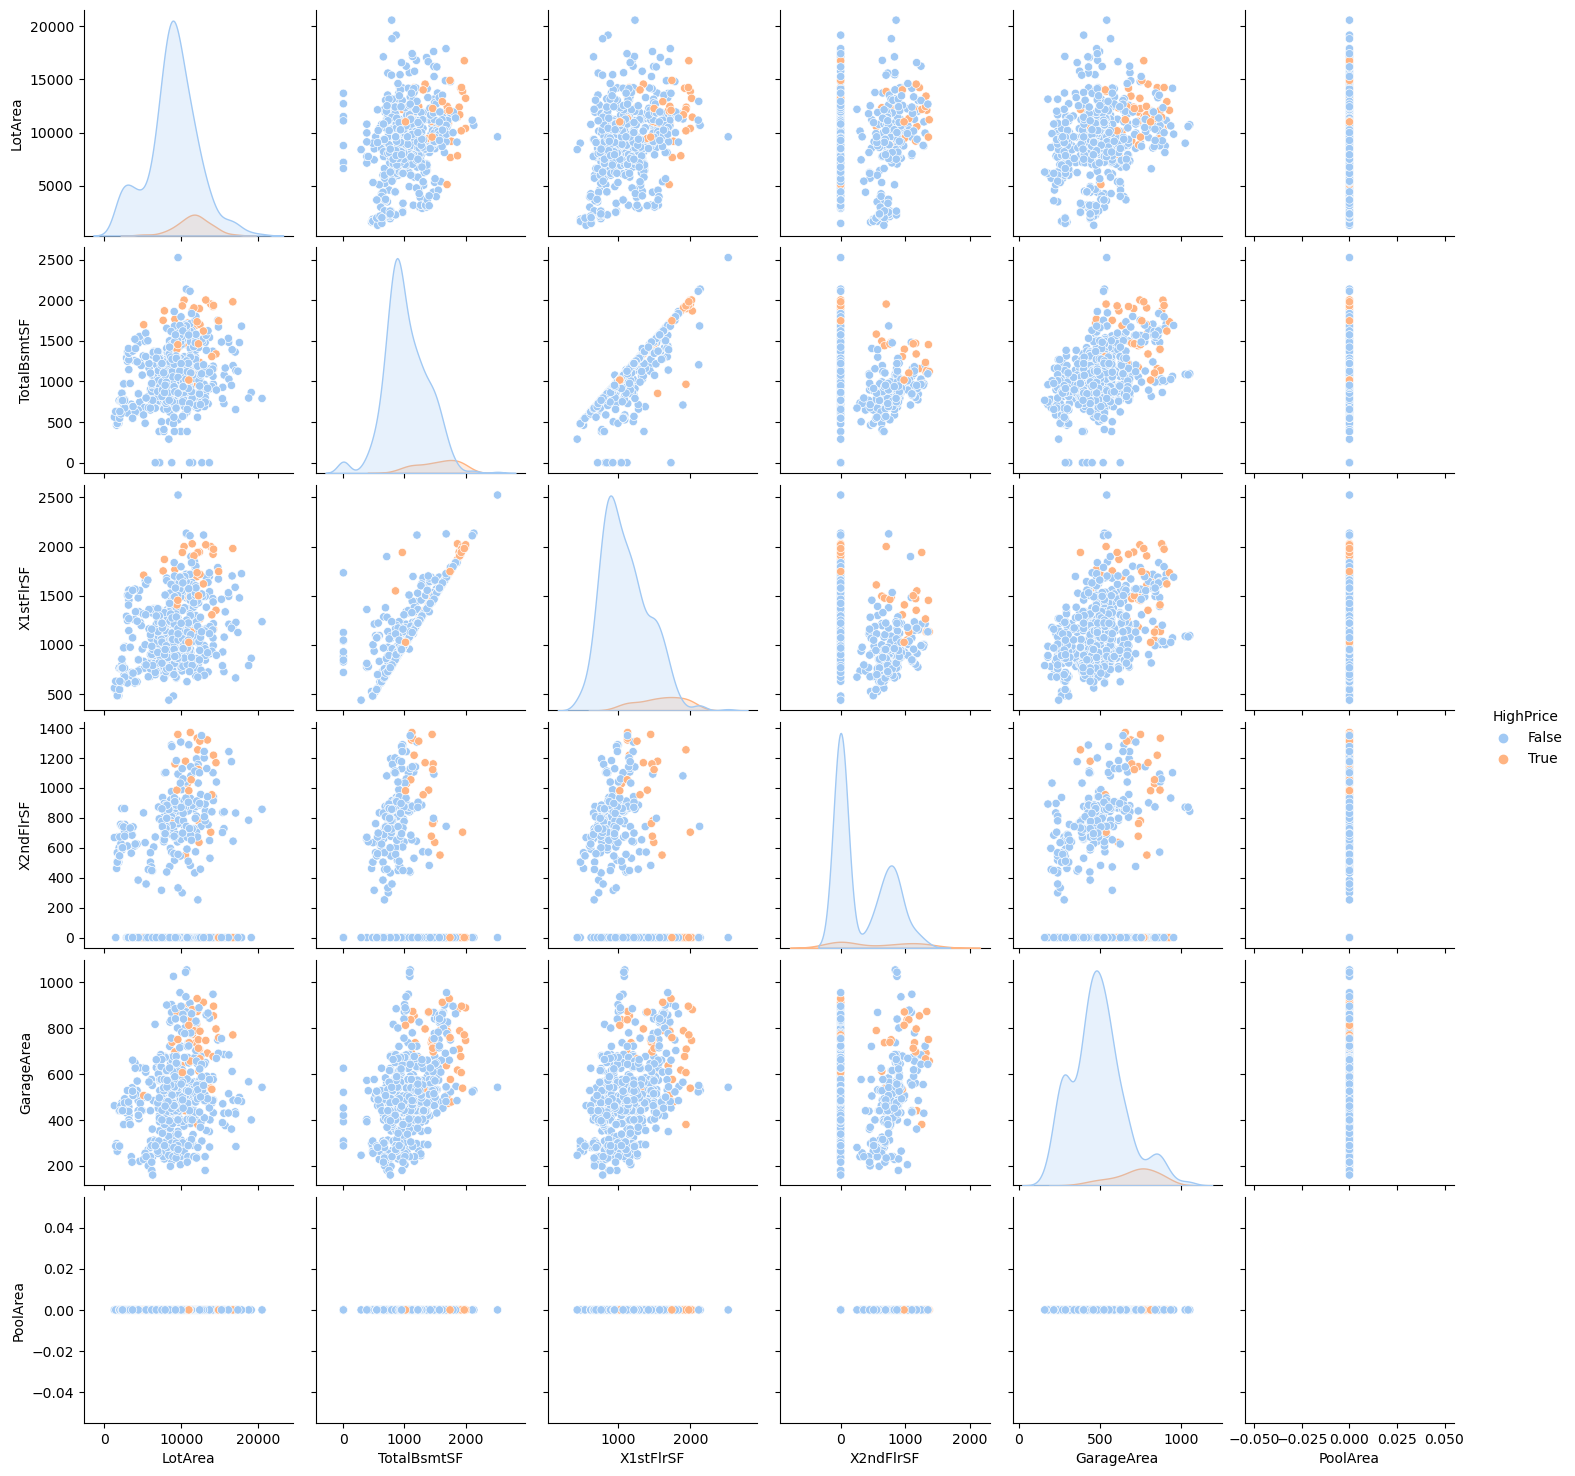

In [14]:
sns.pairplot(adjDf[["LotArea", "TotalBsmtSF", "X1stFlrSF", "X2ndFlrSF", "GarageArea", "PoolArea", "HighPrice"]], hue="HighPrice", palette="pastel")
print()


Lot Area, Total Basement Area, 1st Floor Area, 2nd Floor Area, Garage Area and Pool Area are correleatied with High Price group tends to have larger size in different aspect.

### Module 3: Dimension Reduction

Apply unsupervised learning methods to achieve dimension reduction. Visualize and interpret the results. Any dimension reduction algorithms can be used.


In [16]:
predictors = adjDf.drop("SalePrice", axis=1).drop("HighPrice", axis=1)
for col in predictors.columns:
    if predictors[col].dtype is object:
        predictors[col] = OrdinalEncoder().fit_transform(predictors[[col]])

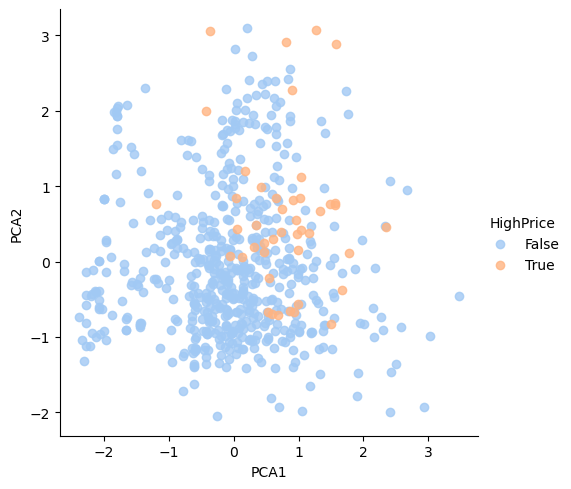

In [17]:
model = PCA(n_components=2, whiten=True)
model.fit(predictors)
X_2D = model.transform(predictors)

adjDf.insert(len(adjDf.columns), "PCA1", X_2D[:, 0])
adjDf.insert(len(adjDf.columns), "PCA2", X_2D[:, 1])
sns.lmplot(data=adjDf, x="PCA1", y="PCA2", hue='HighPrice', fit_reg=False)
print()


### Module 4: Regression and Prediction

Choose three regression methods and build regression models based on data from `housing_train.csv`, using 5-fold cross-validation. <br>

Further, load `housing_test.csv` and use it as the test dataset to evaluate your models and compare their performance. Consider visualizing the results, and evaluate the results using metrics such as the mean squared error. Which houses have the worst prediction and what are their characteristics? <br>

Note: we don"t deduct points based on accuracy, as long as the models can be fitted correctly and the results are reasonable. However, if the model is wrong and does not yield meaningful and interpretable results, or if the results are interpreted incorrectly and wrong conclusions are drawn, points will be deducted.


#### Polynomial regression

#### Ridge Regression

#### Lasso Regression

### Module 5: Summary

Summarize your findings and draw conclusions.
